### First Example

We start by trying to predict a value of the determinstic function:
$$ f(x) = sin(x) + exp(-0.1(x-2)^2))$$

At the point $x=1$, given that the function with noise. I.e,
$$
y_i = f(x_i) + \epsilon_i 
$$

In [22]:
import numpy as np
import numpy.random as npr
npr.seed(1)
def f(x):
    return( np.sin(x)+np.exp(-0.1*(x-1)**2))

x_obs1 = np.array([0.1,0.2,1.8,1.9])
y_obs1 = f(x_obs1) + 0.1*npr.randn(x_obs1.size)

We start by visulazing the four observation, and the true function.

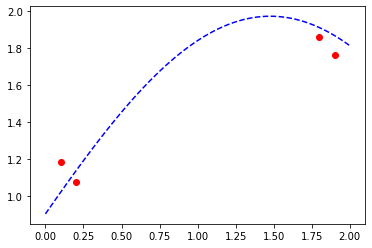

In [23]:
from matplotlib import pyplot as plt

plt.plot(x_obs1, y_obs1, 'ro')
x_grid = np.linspace(0,2,100)
plt.plot(x_grid, f(x_grid),'b--')
plt.show()

#### execise 1 
    Follow the slides to fit a Gaussian processes to the observations and visualize the estimated function
    and the corresponding unceratinty.

In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as kernels
kernel = 

gp1 = GaussianProcessRegressor(kernel=kernel, 
                              optimizer='fmin_l_bfgs_b',
                              n_restarts_optimizer = 2)


xgrid = np.atleast_2d(x_grid).T

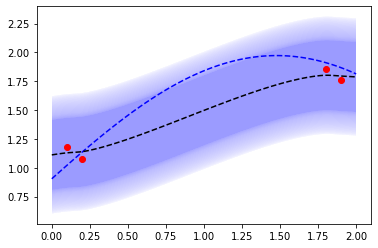

In [28]:
%matplotlib inline
plt.plot(x_obs1, y_obs1, 'ro')
x_grid = np.linspace(0,2,100)
plt.plot(x_grid, f(x_grid),'b--')


Now we add some more observations, examine how the uncertainty changes

In [29]:
x_obs2 = np.array([0.3,0.4,0.5,0.6,1.7,1.6,1.5,1.4])
y_obs2 = f(x_obs2) + 0.1*npr.randn(x_obs2.size)
x_obs  = np.hstack([x_obs1,x_obs2])
y_obs  = np.hstack([y_obs1,y_obs2])

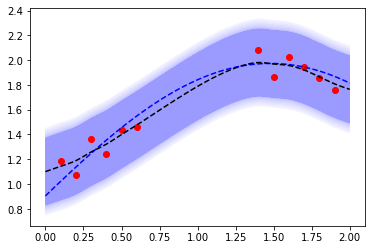

In [31]:
import copy as cp
gp2 = cp.deepcopy(gp1)

Now we have an other 100 observations. Now also show the $95\%$CI for the observations

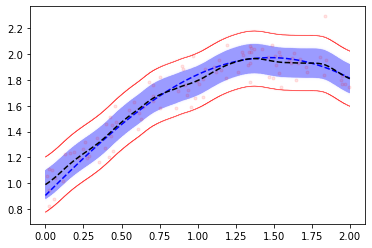

In [34]:
x_obs  = npr.rand(100)*2
y_obs  = f(x_obs) + 0.1*npr.randn(x_obs.size)
gp = cp.deepcopy(gp1)


### Exercise 2
We have now viewed how the uncertainty of the function decreases with observations. 
An alternative view could be just examine the distribution of a spesific point.
Here we will redo the analyze but now only examine the unceartiny of $f(1)$, i.e. $x=1.0$.
Plot the distrbution for the point f(1) for the Gaussian processes of the three data sets.

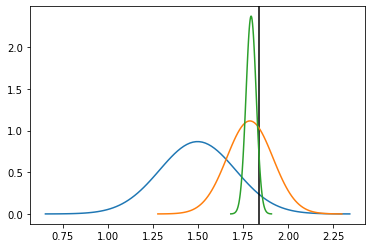

In [35]:
def normpdf(x, mu, sigma):
    '''
        normal density function
    '''
    return( 1/np.sqrt(2*np.pi*sigma) * np.exp(-0.5 * (x-mu)**2/sigma**2))

x1 = 
f1_mu, f1_sd = gp1.predict(x1, return_std=True)


val_grid1 = np.linspace(f1_mu-4*f1_sd,f1_mu+4*f1_sd,100)
plt.plot(val_grid1, normpdf(val_grid1, ? , ?))
plt.axvline(f(1), color='k', linestyle='solid')

f2_mu, f2_sd = gp2.predict(x1, return_std=True)
val_grid2 = np.linspace(f2_mu-4*f2_sd,f2_mu+4*f2_sd,100)
plt.plot(val_grid2, normpdf(val_grid2, ?, ?))

f_mu, f_sd = gp.predict(x1, return_std=True)

val_grid3 = np.linspace(f_mu-4*f_sd,f_mu+4*f_sd,100)
plt.plot(val_grid3, normpdf(val_grid3, ?, ?))

## Latent Gaussian
Often Gaussian processes are used together with other models in statistical modeling, or part of a larger model.
Here we will use a latent Gaussian processes when observing {0,1} (classfication data).

We will look at data taking all the winnvers of the oxford Cambdrige rowing competion results.

The latent structure is
$$
x \sim GP
$$
and the data is 
$$
y(t) \sim Bin(1, p = \frac{\exp(x(t))}{1+ \exp(x(t))})
$$
This implies at year $t$ the probability that oxford wins is $ p=\frac{\exp(x(t))}{1+ \exp(x(t))}$. The function linking the probability, $p$, is the inverse logit function and implies that a large value $x(t)$ gives a high probability for Oxford to win, while a low value of $x(t)$ gives a small probability for winning.

This can be viewed as Classfication processes, and this type of model is implimented in Scikit 

In [36]:

from sklearn.gaussian_process import GaussianProcessClassifier
gp = GaussianProcessClassifier(kernel= kernel)
data= np.loadtxt('boat_race.dat', skiprows=1)
data = data[data[:,1]==1,:]
data = data[:,[0,2]]
years =  data[:,0]
Oxwin =  data[:,1]
gp.fit(years[:,np.newaxis], Oxwin)

GaussianProcessClassifier(copy_X_train=True,
                          kernel=Matern(length_scale=0.1, nu=1) + WhiteKernel(noise_level=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)

### exercise3 
Plot the probability that Oxford wins for each year, using gp.predict_proba

AttributeError: 'GaussianProcessRegressor' object has no attribute 'predict_proba'

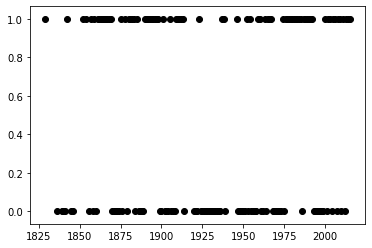

In [41]:
plt.figure()
plt.scatter(years, Oxwin, 
            c='k',
            edgecolors=(0, 0, 0))
X_ = np.linspace(np.min(years), np.max(years), 1000)


#### exercise 3
What is the probability that Oxford wins the year 2020.

#### Exercise 4)
A downside with using off the shelf gaussian process is that the scaling is poor, like evaluating the likhood is
$o(n^3)$ making it infeasible for large problems. 
To see what this means fit a gaussian process for n=10,100,500,1000 observations, and time the optimazation.


In [ ]:
import time
gp = GaussianProcessRegressor(kernel=kernel, 
                              optimizer='fmin_l_bfgs_b')

ns = [10, 100, 500, 800, 1000]
times = np.zeros(len(ns))
i = 0
for n in ns:
    print('n = {}'.format(n))
    t0 = time.time()
    x_obs = npr.rand(n)
    y_obs = f(x_obs) + 0.1*npr.randn(x_obs.size)
    t1 = time.time()
    times[i]= t1
    i += 1


Text(0, 0.5, 'log(time)')

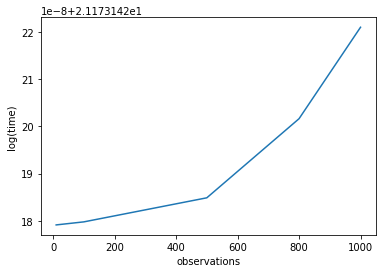

In [40]:
plt.plot(ns,times)
plt.xlabel('observations')
plt.ylabel('time')